In [1]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

Welcome to ROOTaaS 6.06/06
purities:
[ 0.2080955   0.33947809  0.48394409  0.509     ]
[ 0.03765166  0.04768804  0.04896864  0.048     ]
['../InputData/zT_Rebin_5/pp_SE_L0_Correlation_GMB_Ratio.root', '../InputData/zT_Rebin_5/pPb_SE_L0_Correlation_GMB_Ratio.root']
purities:
[ 0.2080955   0.33947809  0.48394409  0.509     ]
[ 0.03765166  0.04768804  0.04896864  0.048     ]
['../InputData/zT_Rebin_5/pp_SE_L0_Correlation_GMB_Ratio.root', '../InputData/zT_Rebin_5/pPb_SE_L0_Correlation_GMB_Ratio.root']


In [95]:
Corrs = ROOT_to_nparray()
print(purity)

[ 0.2080955   0.33947809  0.48394409  0.509     ]


In [96]:
if not(Ped_Sub_First):
    Correlated_Subtraction(Corrs)
    #Plot_UB_Subtraction(Corrs)
    Ped_Sub_After_Cs(Corrs)

In [97]:
if (Ped_Sub_First):
    #Plot_UB()
    #Plot_Sub_UB_Overlay(Corrs)
    Correlated_Subtraction(Corrs)

$C_S = \frac{C_{SR} - (1-p) C_{BR}}{p}$

In [98]:
#Plot_pp_pPb_Cs(Corrs)

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

In [99]:
Frags = Get_Fragmentation(Corrs)

## p-Pb / pp

In [100]:
reload(functions_fragmentation)
from functions_fragmentation import *
print(Frags["pp_FF"][2])

[ 8.81304124  3.22786156  0.62560304  0.1461112   0.0120971 ]


**Weigthed Average:** $\frac{\sum_{i=1}^{n}w_i x_i}{\sum_{i=1}^{n}w_i}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [101]:
Combined_Frags = Average_FF(Frags)
print(Combined_Frags)

{'pp_Combined_FF_Errors': array([ 0.50728551,  0.2166668 ,  0.07950436,  0.02233382,  0.00387116]), 'p-Pb_purity_Uncertainty': array([ 0.59736843,  0.28458448,  0.08198611,  0.01626789,  0.00179474]), 'p-Pb_Combined_FF': array([  9.75319440e+00,   3.61160824e+00,   9.55864801e-01,
         1.75407066e-01,   2.92830166e-03]), 'pp_Combined_FF': array([ 7.03048515,  2.90474026,  0.68204195,  0.17173973,  0.01858365]), 'pp_purity_Uncertainty': array([ 0.34197576,  0.22578291,  0.05885119,  0.01545356,  0.00141764]), 'p-Pb_Combined_FF_Errors': array([ 0.53031222,  0.35113599,  0.07351921,  0.01643161,  0.00282967])}


functions_fragmentation.py:97: RuntimeWarning: invalid value encountered in divide
  Rel_Stat_Erorr = FF_Errors/FF
functions_fragmentation.py:98: RuntimeWarning: invalid value encountered in divide
  Rel_Purity_Error = purity_FF_Errors/FF


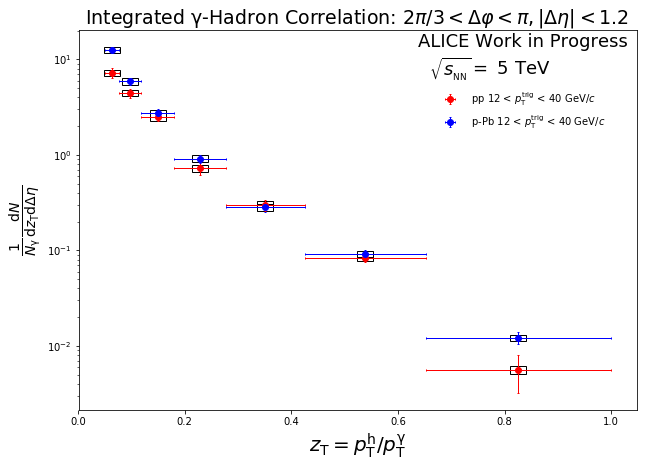

                    pp Central Values:
[  7.25272257e+00   4.46635631e+00   2.48879644e+00   7.25958367e-01
   2.98694327e-01   8.37881176e-02   5.58467596e-03]

                    pp Stat. Uncertainty:
[ 0.83250249  0.47460702  0.23088021  0.10832206  0.03708839  0.00908958
  0.00236167]

                    p-Pb Central Values:
[  1.26748528e+01   5.92617979e+00   2.74180843e+00   9.13283921e-01
   2.81492332e-01   9.25672577e-02   1.21618946e-02]

                    p-Pb Stat. Uncertainty:
[ 0.83479103  0.47621414  0.2798534   0.08593329  0.02902222  0.00946039
  0.00166058]

                        LaTeX Table
Source   &  pp data & \pPb~data  \\
Statistical Uncertainty & 9\%-42\% & 7\%-14\% \\
\hline
Purity & 4\%-8\% & 5\%-7\% \\
Tracking Efficiency &  5\% & 5\%  \\ 


In [9]:
Plot_pp_pPb_Avg_FF(Combined_Frags)

In [10]:
reload(functions_fragmentation)
from functions_fragmentation import *

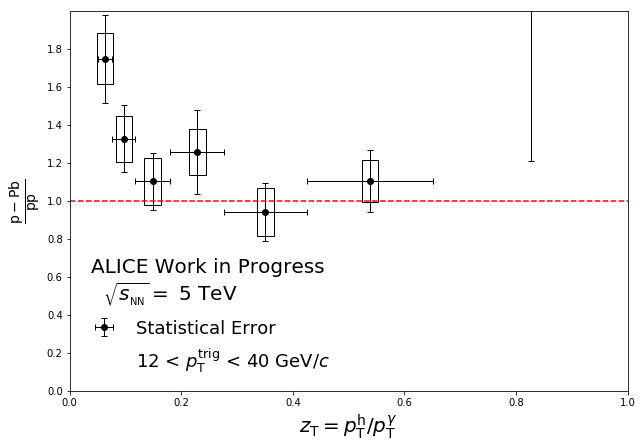

                Central Values:
[ 1.74759929  1.32684886  1.10166038  1.25803898  0.94240937  1.10477787
  2.1777261 ]

                Ratio Uncertainty from Purity:
[ 0.05279759  0.07737083  0.09274681  0.08282679  0.10713394  0.07519641
  0.07116164]

                Ratio Uncertainty from Single Track Efficiency:
[ 0.12357393  0.09382238  0.07789915  0.08895679  0.06663841  0.07811959
  0.15398849]

                Full Systematic Uncertainty:
[ 0.13438044  0.12160956  0.1211208   0.12154665  0.12616798  0.10843048
  0.16963618]

****************************************
Minimizer is Linear
Chi2                      =      10.8027
NDf                       =            6
p0                        =      1.18779   +/-   0.0715211   

****************************************
Minimizer is Linear
Chi2                      =      8.48009
NDf                       =            5
p0                        =      1.35562   +/-   0.131307    
p1                        =    -0.639469   +/-   

In [11]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

## Compare Trigger pT Bins

In [13]:
Plot_FF(Frags)

ZeroDivisionError: integer division or modulo by zero

In [ ]:
FF_Ratio(Frags)

In [ ]:
Overlay_pT_FF(Frags)

In [ ]:
import functions_fragmentation
reload(functions_fragmentation)
from functions_fragmentation import *

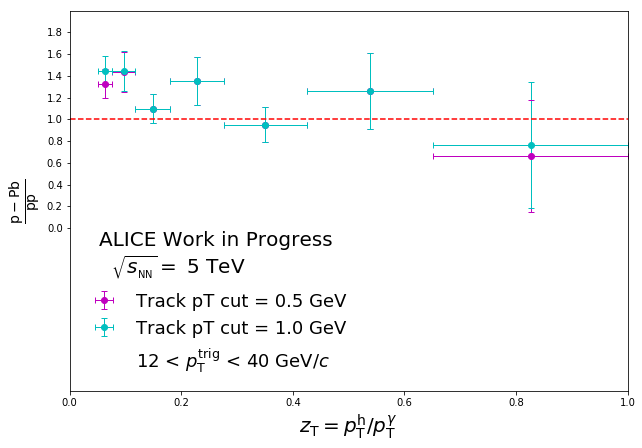

                Central Values:
[ 1.32914006  1.43672974  1.09574319  1.35002169  0.94964235  1.26255443
  0.65928593]


In [14]:
Ratio_1zt = np.load("npy_files/LO_Averaged_FF_Ratio_1zT.npy")
Ratio_Errors_1zt = np.load("npy_files/LO_Averaged_FF_Ratio_Errors_1zT.npy")
Ratio_05zt = np.load("npy_files/LO_Averaged_FF_Ratio_05zT.npy")
Ratio_Errors_05zt = np.load("npy_files/LO_Averaged_FF_Ratio_Errors_05zT.npy")

Compare_pp_pPB_Avg_Ratio(Ratio_05zt,Ratio_Errors_05zt,"Track pT cut = 0.5 GeV",Ratio_1zt,Ratio_Errors_1zt,"Track pT cut = 1.0 GeV")

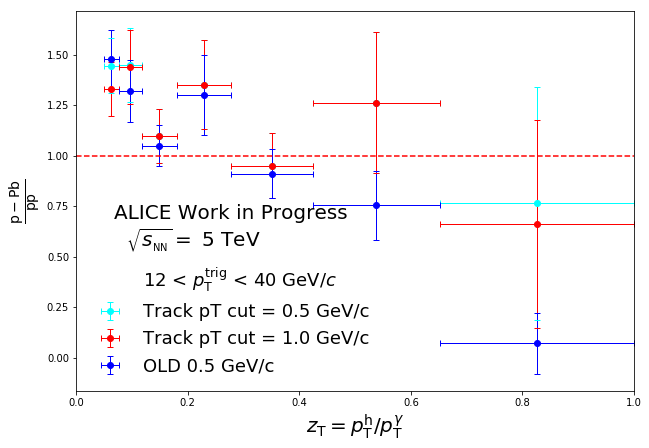

                Central Values:
[ 1.47546927  1.31963154  1.04878313  1.29933689  0.91089677  0.75447711
  0.07122347]


In [76]:
strings = ["1zT","05zT","05zT_working_old"]
string_descriptions = ["Track pT cut = 0.5 GeV/c", "Track pT cut = 1.0 GeV/c","OLD 0.5 GeV/c"]
colors = ["cyan","red","blue"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors)

## Compare Trigger Photon pT Binning (3,4,& 5 Bins)

In [74]:
import functions_fragmentation
reload(functions_fragmentation)
from functions_fragmentation import *

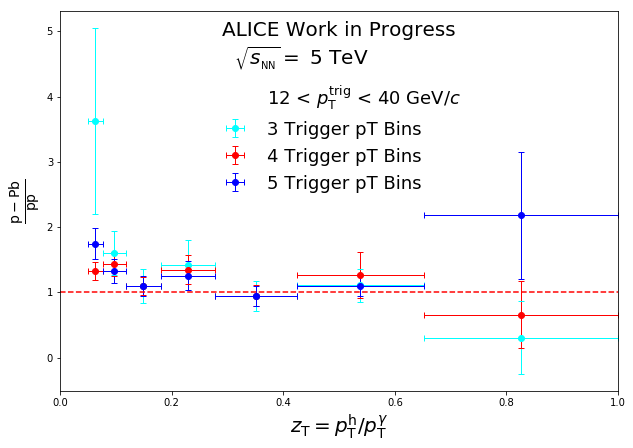

                Central Values:
[ 1.74759929  1.32684886  1.10166038  1.25803898  0.94240937  1.10477787
  2.1777261 ]


In [75]:
strings = ["pT_Rebin_3","05zT","pT_Rebin_5"]
string_descriptions = ["3 Trigger pT Bins", "4 Trigger pT Bins","5 Trigger pT Bins"]
colors = ["cyan","red","blue"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors)

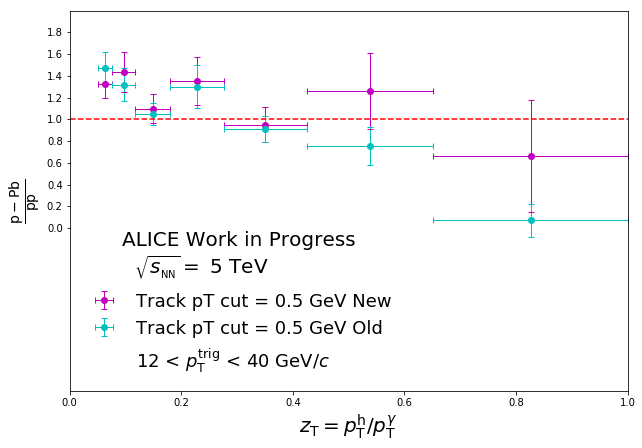

                Central Values:
[ 1.32914006  1.43672974  1.09574319  1.35002169  0.94964235  1.26255443
  0.65928593]


In [15]:
Ratio_1zt = np.load("npy_files/LO_Averaged_FF_Ratio_05zT_working_old.npy")
Ratio_Errors_1zt = np.load("npy_files/LO_Averaged_FF_Ratio_Errors_05zT_working_old.npy")
Ratio_05zt = np.load("npy_files/LO_Averaged_FF_Ratio_05zT.npy")
Ratio_Errors_05zt = np.load("npy_files/LO_Averaged_FF_Ratio_Errors_05zT.npy")

Compare_pp_pPB_Avg_Ratio(Ratio_05zt,Ratio_Errors_05zt,"Track pT cut = 0.5 GeV New",Ratio_1zt,Ratio_Errors_1zt,"Track pT cut = 0.5 GeV Old")

In [90]:
Number_of_zT_Bins = 9
zBins = np.geomspace(0.05, 1.0, num=Number_of_zT_Bins+1)

In [91]:
for zt in zBins:
    if (zt == zBins[len(zBins)-1]):
        print("%1.2f]")%(zt),
    elif (zt == zBins[0]):
        print("[%1.2f,")%(zt),
    else:
        print("%1.2f,")%(zt),

[0.05, 0.07, 0.10, 0.14, 0.19, 0.26, 0.37, 0.51, 0.72, 1.00]


In [ ]:
Number_of_pT_Bins = 5
pTBins = np.geomspace(12, 40, num=Number_of_pT_Bins+1)

In [ ]:
for pt in pTBins:
    if (pt == pTBins[len(pTBins)-1]):
        print("%1.2f]")%(pt),
    elif (pt == pTBins[0]):
        print("[%1.2f,")%(pt),
    else:
        print("%1.2f,")%(pt),